### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [16]:
sunspots = sm.datasets.sunspots.load_pandas()
air = pd.read_csv('data/AirPassengers.csv')

In [28]:
air.head()
# air.info()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [30]:
air = air.set_index(pd.to_datetime(air['Month'], format = '%Y-%m')).drop(columns = ['Month'])
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
y_hist = air.loc[:, '#Passengers']
h = len(y_hist)


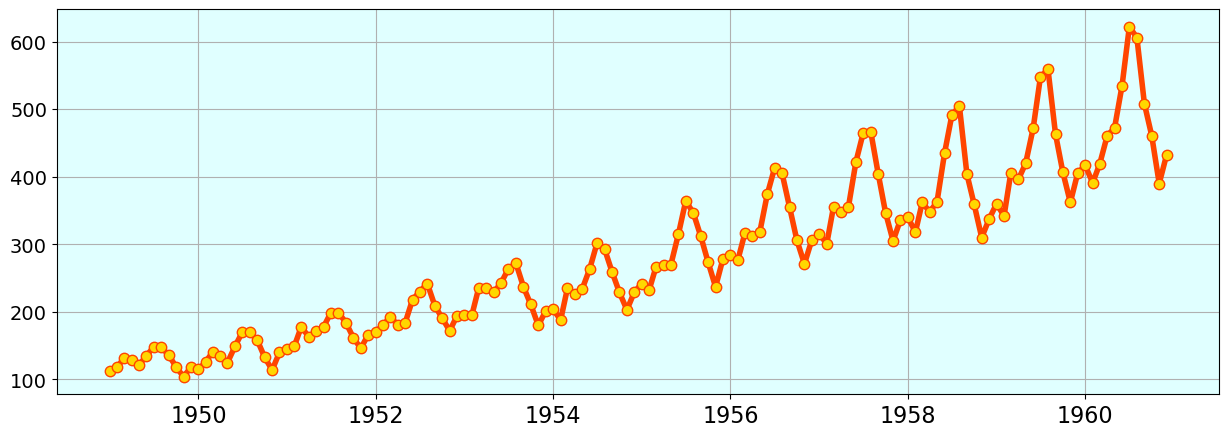

In [34]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('lightcyan')
plt.plot(y_hist,'.-',
         markerfacecolor='gold',
         markersize=15,
         linewidth=4,
         color='orangered')
plt.grid()
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
# plt.xlim((6000, 19000))
myylim = plt.ylim()

In [49]:
period = 11
res = seasonal_decompose(y_hist, period = period, extrapolate_trend = True)
print(res.trend.size)
print(res.seasonal.size)
print(res.trend)
print(res.seasonal)

144
144
Month
1949-01-01    124.727273
1949-02-01    125.272727
1949-03-01    125.818182
1949-04-01    126.363636
1949-05-01    126.909091
                 ...    
1960-08-01    477.454545
1960-09-01    476.090909
1960-10-01    474.727273
1960-11-01    473.363636
1960-12-01    472.000000
Name: trend, Length: 144, dtype: float64
Month
1949-01-01    -7.662156
1949-02-01    -1.803015
1949-03-01     2.106076
1949-04-01     8.770411
1949-05-01    10.413768
                ...    
1960-08-01     1.462719
1960-09-01    -8.593225
1960-10-01   -13.040777
1960-11-01   -12.851966
1960-12-01    -7.662156
Name: seasonal, Length: 144, dtype: float64


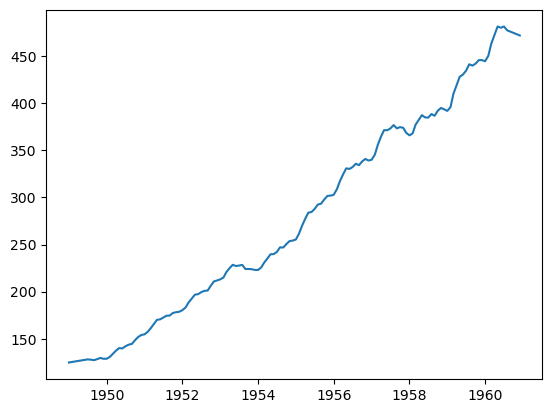

In [50]:
plt.plot(res.trend)

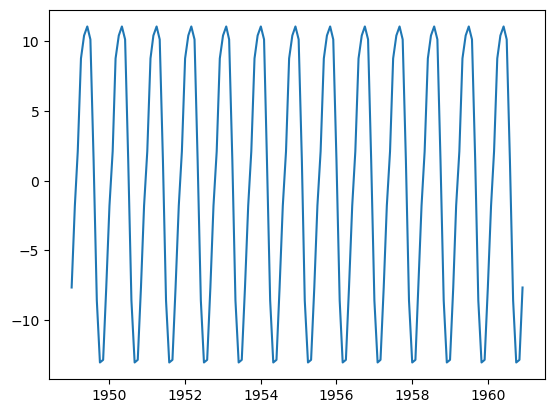

In [51]:
plt.plot(res.seasonal)

In [25]:
sunspots_df = pd.DataFrame(data = sunspots.data)
sunspots_df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [45]:
# sunspots_df = sunspots_df.set_index(pd.to_datetime(sunspots_df['YEAR'], format = '%Y')).drop(columns = ['YEAR'])
sunspots_df

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2


In [47]:
y2_hist = sunspots_df.loc[:, 'SUNACTIVITY']
h = len(y_hist)


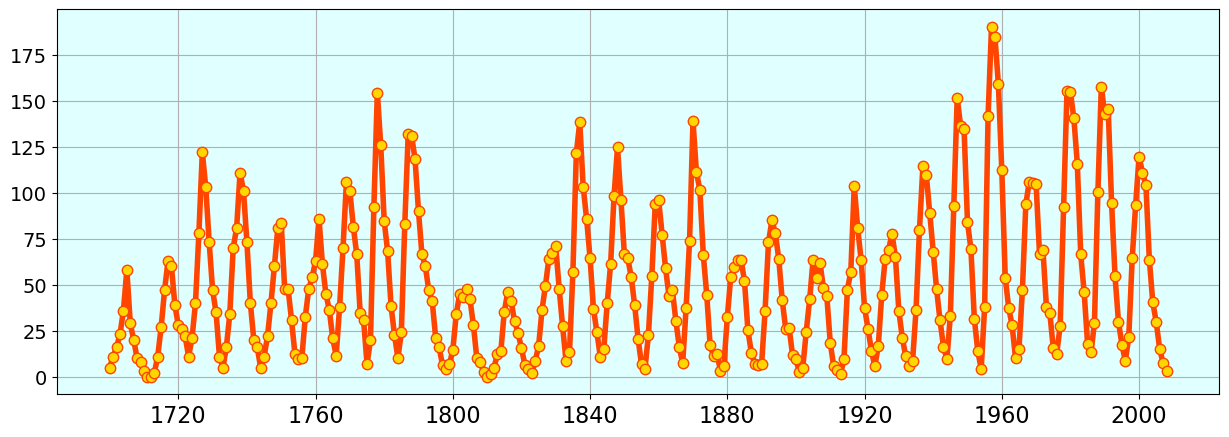

In [48]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('lightcyan')
plt.plot(y2_hist,'.-',
         markerfacecolor='gold',
         markersize=15,
         linewidth=4,
         color='orangered')
plt.grid()
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
# plt.xlim((6000, 19000))
myylim = plt.ylim()

In [61]:
period2 = 30
res2 = seasonal_decompose(y2_hist, period = period2, extrapolate_trend = True)
print(res2.trend.size)
print(res2.seasonal.size)
print(res2.trend)
print(res2.seasonal)

309
309
YEAR
1700-01-01    17.266667
1701-01-01    18.366667
1702-01-01    19.466667
1703-01-01    20.566667
1704-01-01    21.666667
                ...    
2004-01-01    71.963333
2005-01-01    71.673333
2006-01-01    71.383333
2007-01-01    71.093333
2008-01-01    70.803333
Name: trend, Length: 309, dtype: float64
YEAR
1700-01-01     8.247493
1701-01-01     1.411281
1702-01-01    -5.978719
1703-01-01   -17.807810
1704-01-01   -20.649325
                ...    
2004-01-01   -20.649325
2005-01-01   -19.303568
2006-01-01   -16.614022
2007-01-01    -3.233113
2008-01-01     6.690372
Name: seasonal, Length: 309, dtype: float64


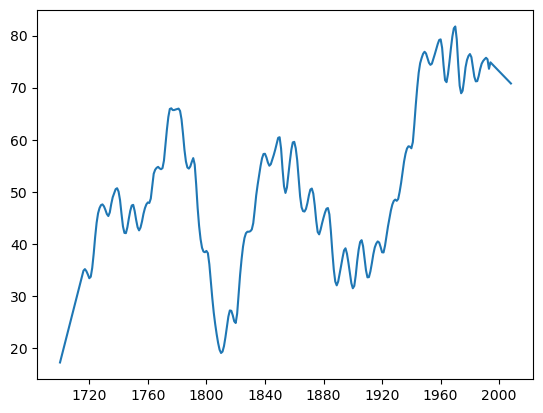

In [62]:
plt.plot(res2.trend)

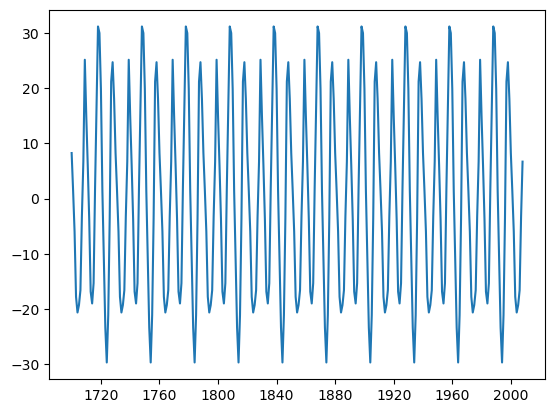

In [63]:
plt.plot(res2.seasonal)